In [2]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline
 

In [3]:
df = pd.read_csv('planetlab02.csv', header=0, squeeze=True)
df.head()

,Time_Stamp,cpu_percentage
0,2014-05-22 1:0:50,8
1,2014-05-30 15:28:36,0
2,2014-04-18 21:35:58,0
3,2014-04-15 17:8:5,0
4,2014-05-12 1:39:37,2


In [4]:
cols=[0,1]
data_frame=df[df.columns[cols]]
data_frame.set_index('Time_Stamp',inplace=True)
data_frame.head()

,cpu_percentage
Time_Stamp,
2014-05-22 1:0:50,8
2014-05-30 15:28:36,0
2014-04-18 21:35:58,0
2014-04-15 17:8:5,0
2014-05-12 1:39:37,2


In [5]:
X = data_frame.values
#print(X)
#print(type(X))
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=1.400566, expected=0.000000
predicted=1.072742, expected=0.000000
predicted=1.060592, expected=0.000000
predicted=0.867995, expected=0.000000
predicted=1.147548, expected=0.000000
predicted=0.814799, expected=0.000000
predicted=0.755458, expected=2.000000
predicted=0.778516, expected=0.000000
predicted=0.744585, expected=0.000000
predicted=0.755633, expected=2.000000
predicted=0.662788, expected=2.000000
predicted=1.057886, expected=0.000000
predicted=0.819774, expected=6.000000
predicted=0.943977, expected=6.000000
predicted=1.405625, expected=9.000000
predicted=2.016023, expected=11.000000
predicted=2.008703, expected=14.000000
predicted=3.527462, expected=8.000000
predicted=3.867033, expected=5.000000
predicted=4.484586, expected=9.000000
predicted=4.785800, expected=9.000000
predicted=5.623341, expected=4.000000
predicted=5.095763, expected=9.000000
predicted=4.765323, expected=11.000000
predicted=5.495475, expected=13.000000
predicted=6.232672, expected=13.000000
predict

predicted=9.041654, expected=15.000000
predicted=10.257071, expected=5.000000
predicted=9.060535, expected=9.000000
predicted=9.335447, expected=8.000000
predicted=9.681899, expected=9.000000
predicted=10.220171, expected=13.000000
predicted=8.919244, expected=11.000000
predicted=9.615788, expected=9.000000
predicted=9.529280, expected=5.000000
predicted=9.267845, expected=8.000000
predicted=9.695091, expected=8.000000
predicted=9.355495, expected=9.000000
predicted=9.276458, expected=22.000000
predicted=9.212220, expected=4.000000
predicted=9.556542, expected=7.000000
predicted=9.585807, expected=9.000000
predicted=8.828714, expected=7.000000
predicted=11.118540, expected=9.000000
predicted=8.671411, expected=9.000000
predicted=8.931994, expected=7.000000
predicted=9.204386, expected=3.000000
predicted=8.575208, expected=8.000000
predicted=8.672735, expected=11.000000
predicted=8.755954, expected=7.000000
predicted=8.699174, expected=9.000000
predicted=8.049218, expected=5.000000
pred

C:\Users\Prameela\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.008610, expected=9.000000
predicted=11.966209, expected=13.000000
predicted=11.004467, expected=21.000000
predicted=12.651314, expected=9.000000
predicted=12.578475, expected=7.000000
predicted=11.602587, expected=2.000000
predicted=11.038473, expected=9.000000
predicted=12.261537, expected=10.000000
predicted=10.708661, expected=11.000000
predicted=10.764241, expected=8.000000
predicted=9.738922, expected=6.000000
predicted=10.311535, expected=7.000000
predicted=10.127830, expected=5.000000
predicted=10.035223, expected=3.000000
predicted=9.339441, expected=2.000000
predicted=8.562369, expected=10.000000
predicted=8.735712, expected=12.000000
predicted=8.746570, expected=6.000000
predicted=8.523130, expected=11.000000
predicted=8.200174, expected=7.000000
predicted=8.948671, expected=9.000000
predicted=9.486301, expected=7.000000
predicted=8.384577, expected=11.000000
predicted=9.294181, expected=11.000000
predicted=8.827436, expected=10.000000
predicted=9.284811, expecte

In [6]:
print(type(test))

<class 'numpy.ndarray'>


In [7]:
print(test)

[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 2]
 [ 0]
 [ 0]
 [ 2]
 [ 2]
 [ 0]
 [ 6]
 [ 6]
 [ 9]
 [11]
 [14]
 [ 8]
 [ 5]
 [ 9]
 [ 9]
 [ 4]
 [ 9]
 [11]
 [13]
 [13]
 [11]
 [ 9]
 [14]
 [ 9]
 [ 6]
 [12]
 [ 9]
 [ 4]
 [11]
 [ 2]
 [ 9]
 [18]
 [ 7]
 [13]
 [15]
 [ 7]
 [27]
 [12]
 [15]
 [ 9]
 [ 6]
 [13]
 [ 4]
 [ 5]
 [ 4]
 [24]
 [ 6]
 [ 7]
 [ 5]
 [14]
 [ 5]
 [ 8]
 [ 4]
 [ 4]
 [ 6]
 [11]
 [ 7]
 [17]
 [ 4]
 [ 9]
 [ 8]
 [ 8]
 [13]
 [ 9]
 [18]
 [ 9]
 [21]
 [13]
 [17]
 [ 5]
 [ 4]
 [ 7]
 [ 9]
 [13]
 [ 3]
 [ 6]
 [ 8]
 [ 7]
 [15]
 [ 7]
 [ 9]
 [11]
 [ 6]
 [ 9]
 [ 8]
 [ 7]
 [ 9]
 [ 5]
 [ 8]
 [ 6]
 [ 9]
 [ 5]
 [ 9]
 [ 8]
 [11]
 [10]
 [11]
 [ 6]
 [ 3]
 [ 4]
 [ 7]
 [10]
 [ 9]
 [ 7]
 [ 7]
 [ 6]
 [ 3]
 [ 8]
 [ 8]
 [ 6]
 [ 8]
 [17]
 [ 5]
 [32]
 [30]
 [44]
 [ 8]
 [ 5]
 [ 2]
 [ 9]
 [ 4]
 [ 6]
 [ 9]
 [ 6]
 [ 2]
 [ 7]
 [ 4]
 [ 8]
 [12]
 [12]
 [11]
 [ 5]
 [ 6]
 [ 7]
 [ 5]
 [ 5]
 [ 7]
 [ 5]
 [ 4]
 [ 5]
 [ 7]
 [ 4]
 [41]
 [ 7]
 [13]
 [ 7]
 [ 9]
 [ 7]
 [ 3]
 [ 5]
 [ 5]
 [ 9]
 [ 4]
 [ 8]
 [ 6]
 [ 7]
 [ 7]
 [ 6]
 [16]
 [ 4]
 [ 9

In [10]:
l1=test.tolist()

In [11]:
import numpy as np
y_true_lab=[]
lu=np.percentile(X,25)
tu=np.percentile(X,75)
for i in range(len(test)):
        if test[i]<=lu:
        #print(a[i],"\tU")
            y_true_lab.append('u')
            
        elif test[i]>=tu:
        #print(a[i],"\tN")
            y_true_lab.append('o')
            #sheet1.write(i+1, 0, a[i])
            #sheet1.write(i+1,1,'n')
        else:
#         #print(a[i],"\t0")
             y_true_lab.append('n')

In [12]:
y_pred=predictions
y_pred_lab=[]
for i in range(len(y_pred)):
        if y_pred[i]<=lu:
        #print(a[i],"\tU")
            y_pred_lab.append('u')
            
        elif y_pred[i]>=tu:
        #print(a[i],"\tN")
            y_pred_lab.append('o')
            #sheet1.write(i+1, 0, a[i])
            #sheet1.write(i+1,1,'n')
        else:
#         #print(a[i],"\t0")
             y_pred_lab.append('n')

In [13]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true_lab,y_pred_lab)
acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
print('Overall accuracy: {} %'.format(acc*100))

Overall accuracy: 77.21088435374149 %


In [14]:
print(type(predictions))

<class 'list'>


In [15]:
import math
math.sqrt(error)

6.741095828116827

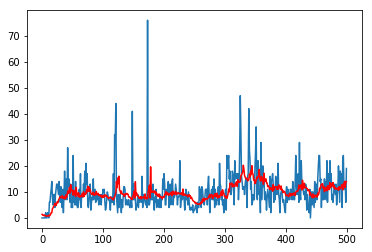

In [17]:
pyplot.plot(test[:500])
pyplot.plot(predictions[:500], color='red')
pyplot.show()